#############################################################
             PROCESSANDO ARQUIVO = 2022050300031300
#############################################################
......... leu os dados do radar
#############################################################
             PROCESSANDO ARQUIVO = 2022050300075600
#############################################################
......... leu os dados do radar
#############################################################
             PROCESSANDO ARQUIVO = 2022050300123900
#############################################################
......... leu os dados do radar
#############################################################
             PROCESSANDO ARQUIVO = 2022050300172200
#############################################################
......... leu os dados do radar
#############################################################
             PROCESSANDO ARQUIVO = 2022050300220500
######################################################

MemoryError: Unable to allocate 55.6 MiB for an array with shape (3794, 1920) and data type float64

MemoryError: Unable to allocate 5.11 MiB for an array with shape (670429,) and data type float64

<Figure size 900x600 with 8 Axes>

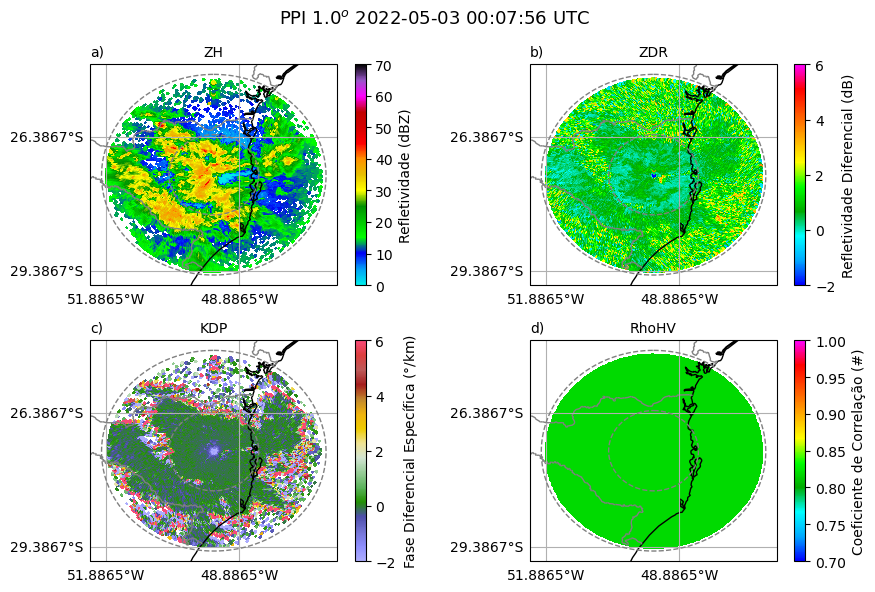

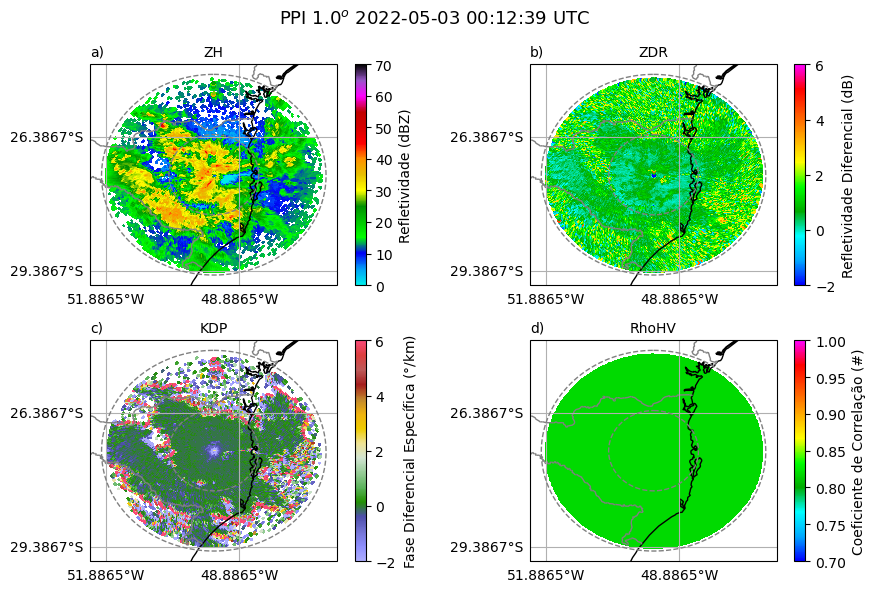

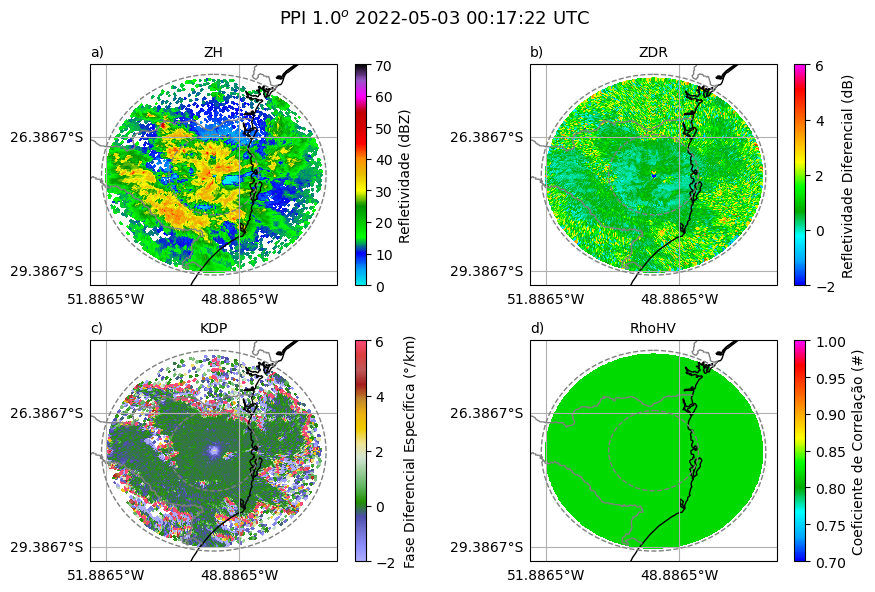

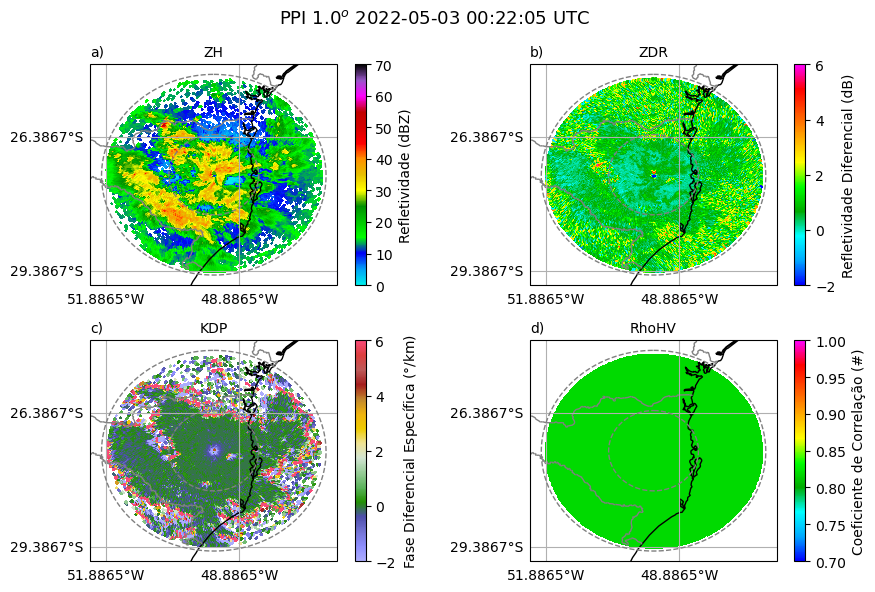

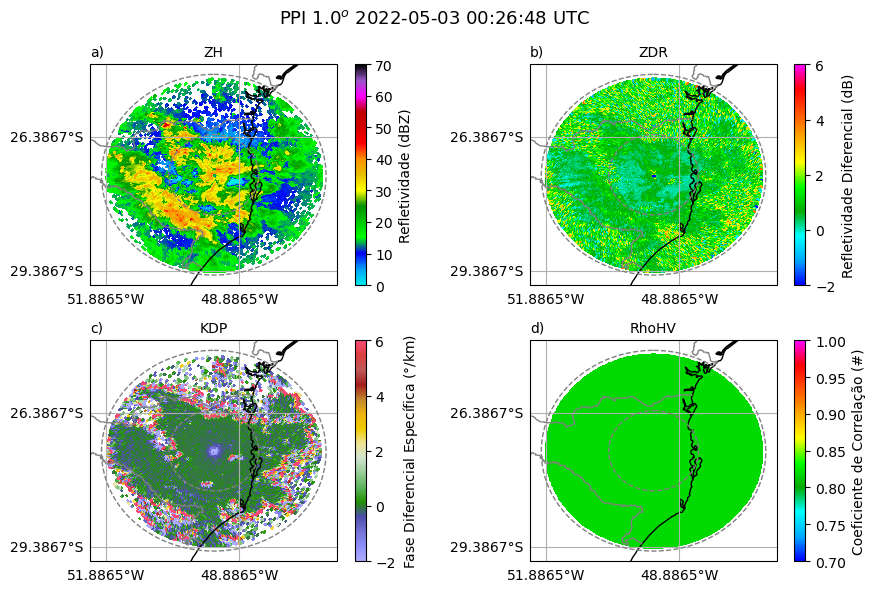

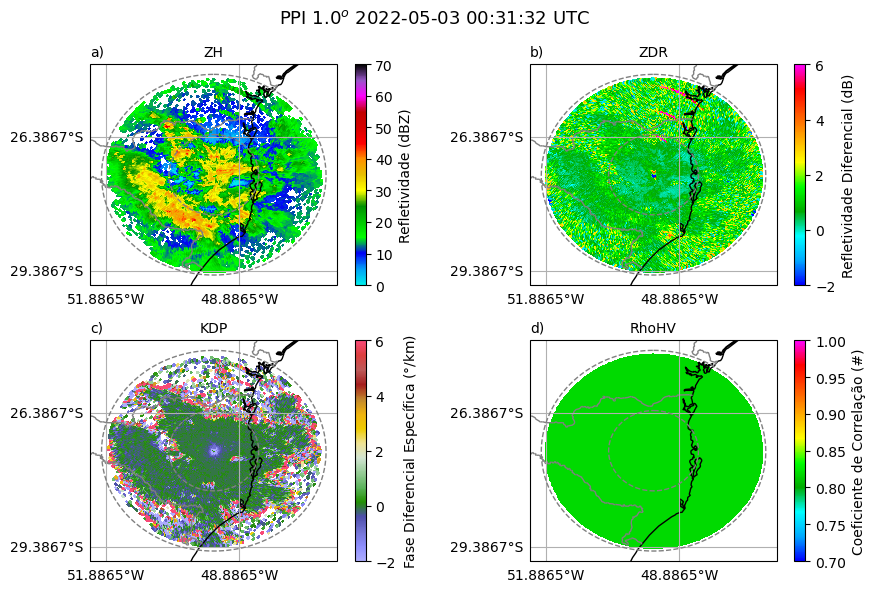

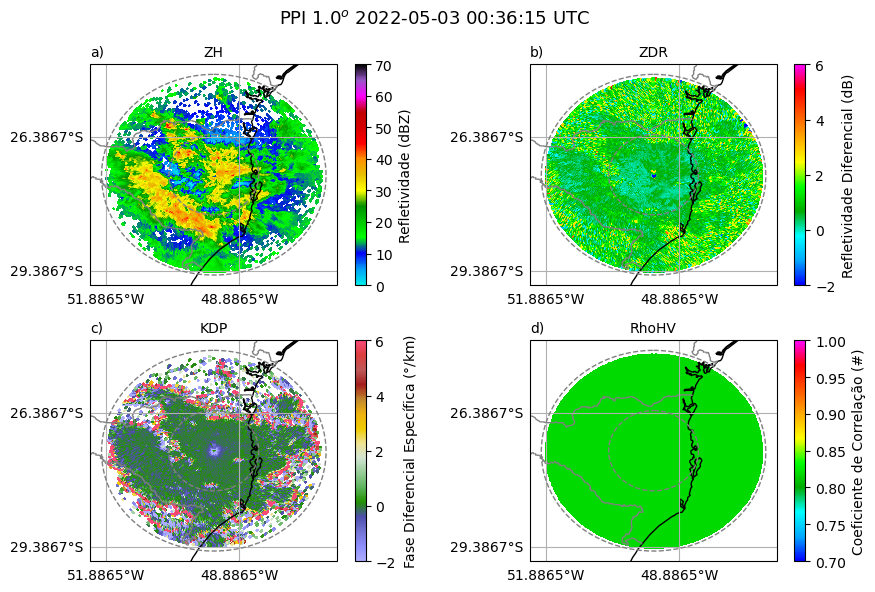

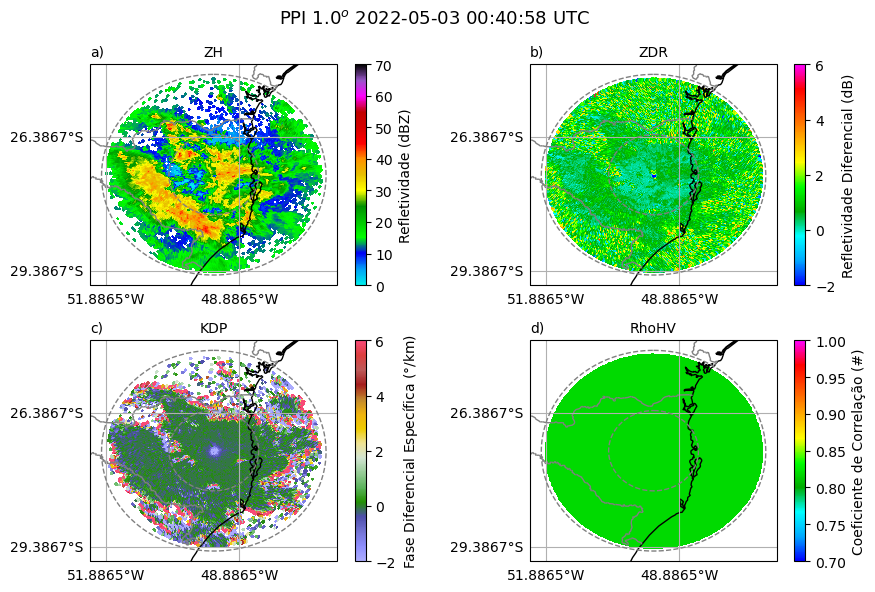

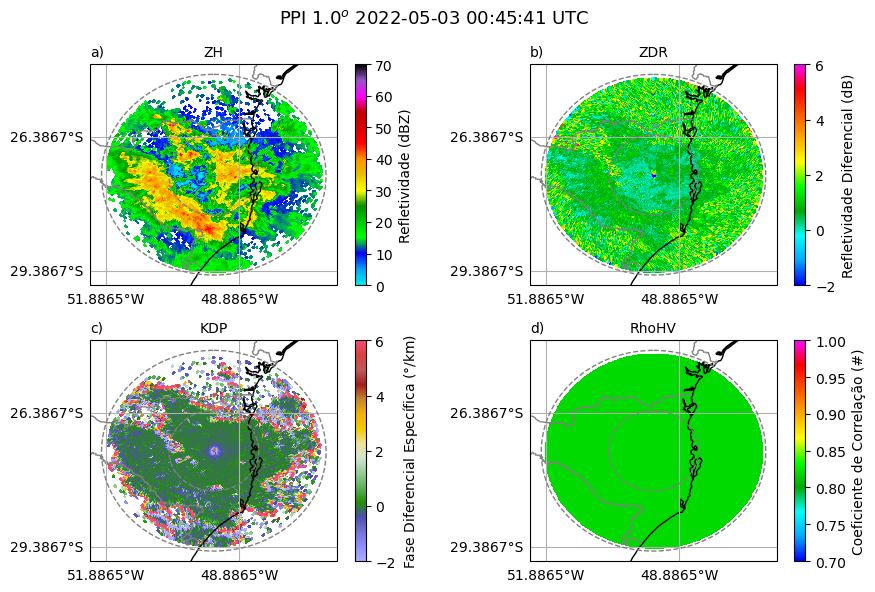

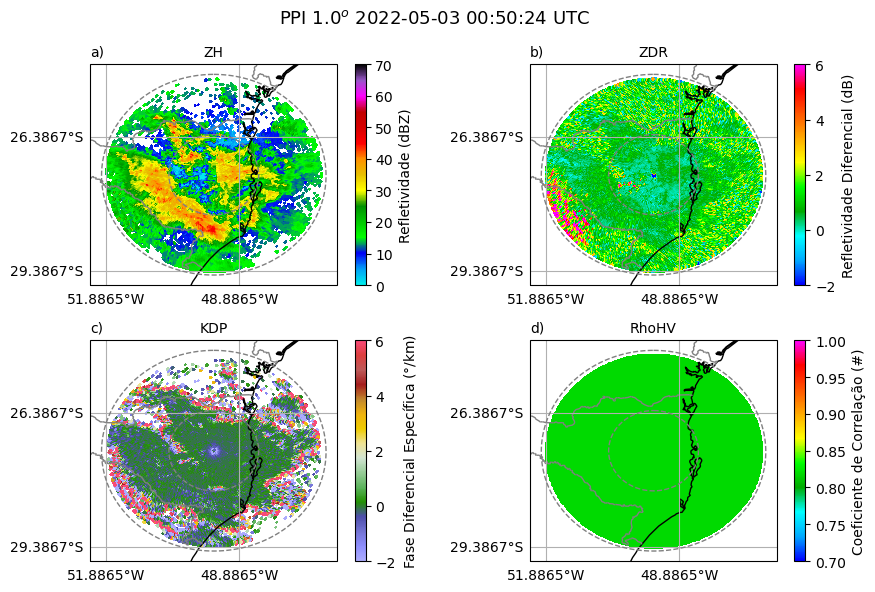

In [ ]:
%%time
#========================================================================================================================#
#                                               IMPORTA BIBLIOTECAS
#========================================================================================================================#
import pyart
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt           
import cartopy.crs as ccrs  
import warnings
warnings.filterwarnings('ignore')

#========================================================================================================================#
#                                             DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
dir_input = '/Users/enriq/Downloads/PROCESSAMENTO_PYTHON/PROJETO_CNPQ_PEDRO/dados_radar/2022-05-03/'
dir_output = 'output/01_PPI/'

#========================================================================================================================#
#                                                    PROCESSAMENTO
#========================================================================================================================#
# lista os arquivos do radar
#files = ['2022050300123900dBZ_ori.vol']
files = sorted(glob.glob(f'{dir_input}*dBZ.vol')) 
#files = files[0:1]

# loop dos arquivos
for file in files:

    #-------------------------------------------------------#
    #             LEITURA DO DADO DO RADAR
    #-------------------------------------------------------#
    # nome do arquivo
    basename = os.path.basename(os.path.splitext(file)[0])[0:16] # De "2024010300065400dBZ" extrai "2024010300065400"

    print('#############################################################')
    print('             PROCESSANDO ARQUIVO =', basename)
    print('#############################################################')

    # leitura do arquivo
    radar_dbz = pyart.aux_io.read_rainbow_wrl(f'{dir_input}{basename}dBZ.vol')
    radar_zdr = pyart.aux_io.read_rainbow_wrl(f'{dir_input}{basename}ZDR.vol')
    radar_kdp = pyart.aux_io.read_rainbow_wrl(f'{dir_input}{basename}KDP.vol')
    radar_cor = pyart.aux_io.read_rainbow_wrl(f'{dir_input}{basename}RhoHV.vol')

    # extrai a latitude, longitude e altitude do radar
    lat_radar, lon_radar = radar_dbz.latitude['data'][0], radar_dbz.longitude['data'][0]
    altitude_radar = radar_dbz.altitude['data'][0]

    # limites dos dados
    latmin, latmax = radar_dbz.gate_latitude['data'].min(), radar_dbz.gate_latitude['data'].max()
    lonmin, lonmax = radar_dbz.gate_longitude['data'].min(), radar_dbz.gate_longitude['data'].max()

    # extrai a data do dado do radar
    data = pyart.util.datetime_from_grid(radar_dbz)

    # extrai a data da imagem
    ano = str(data.year)
    mes = str(data.month).zfill(2)
    dia = str(data.day).zfill(2)
    hor = str(data.hour).zfill(2)
    min = str(data.minute).zfill(2)
    sec = str(data.second).zfill(2)
    print('......... leu os dados do radar')

    #-------------------------------------------------------#
    #                   PLOTA PPI
    #-------------------------------------------------------#
    # define a elevação
    level = 1 #(=segunda elevação)

    # extrai o ângulo de elevação da primeira elevação (level=0)
    str_level = str(radar_dbz.fixed_angle["data"][level])

    # moldura da figura
    fig = plt.figure(figsize=(9,6))

    # título de figura
    plt.suptitle(f'PPI {str_level}$^o$ {ano}-{mes}-{dia} {hor}:{min}:{sec} UTC', fontsize=13)

    #==========================#
    #       FIGURA 1: ZH
    #==========================#
    # cria o objeto display
    display_dbz = pyart.graph.RadarMapDisplay(radar_dbz)

    # moldura da figura
    ax1 = plt.subplot(221, projection=ccrs.PlateCarree())

    # plota o mapa
    display_dbz.plot_ppi_map('reflectivity',
                             sweep=level,
                             vmin=0,
                             vmax=70,
                             lat_0=lat_radar,
                             lon_0=lon_radar,
                             lat_lines=np.arange(latmin, latmax, 3),
                             lon_lines=np.arange(lonmin, lonmax, 3),
                             resolution='10m',
                             colorbar_label='Refletividade (dBZ)',
                             mask_outside=False,
                             ax=ax1,
                             cmap='pyart_NWSRef')

    # título da figura
    plt.title('ZH', fontsize=10)
    plt.title('a)', loc='left', fontsize=10)

    # plota aneis de distância
    display_dbz.plot_range_rings([100, 250], ax=ax1, col='gray', ls='--', lw=1)

    #==========================#
    #      FIGURA 2: ZDR
    #==========================#
    # cria o objeto display
    display_zdr = pyart.graph.RadarMapDisplay(radar_zdr)

    
    # moldura da figura
    ax2 = plt.subplot(222, projection=ccrs.PlateCarree())

    # plota ppi
    display_zdr.plot_ppi_map('differential_reflectivity',
                             sweep=level,
                             vmin=-2,
                             vmax=6,
                             lat_0=lat_radar,
                             lon_0=lon_radar,
                             lat_lines=np.arange(latmin, latmax, 3),
                             lon_lines=np.arange(lonmin, lonmax, 3),
                             resolution='10m',
                             colorbar_label='Refletividade Diferencial (dB)',
                             mask_outside=False,
                             ax=ax2)

    # título da figura
    plt.title('ZDR', fontsize=10)
    plt.title('b)', loc='left', fontsize=10)

    # plota aneis de distância
    display_zdr.plot_range_rings([100, 250], ax=ax2, col='gray', ls='--', lw=1)

    #==========================#
    #     FIGURA 3: KDP
    #==========================#
    # cria o objeto display
    display_kdp = pyart.graph.RadarMapDisplay(radar_kdp)

    # moldura da figura
    ax3 = plt.subplot(223, projection=ccrs.PlateCarree())

    # plota ppi
    display_kdp.plot_ppi_map('specific_differential_phase',
                             sweep=level,
                             vmin=-2,
                             vmax=6,
                             lat_0=lat_radar,
                             lon_0=lon_radar,
                             lat_lines=np.arange(latmin, latmax, 3),
                             lon_lines=np.arange(lonmin, lonmax, 3),
                             resolution='10m',
                             colorbar_label='Fase Diferencial Específica ($\degree$/km)',
                             mask_outside=False,
                             ax=ax3)

    # título da figura
    plt.title('KDP', fontsize=10)
    plt.title('c)', loc='left', fontsize=10)

    # plota aneis de distância
    display_kdp.plot_range_rings([100, 250], ax=ax3, col='gray', ls='--', lw=1)

    #==========================#
    #     FIGURA 4: COR
    #==========================#
    # cria o objeto display
    display_cor = pyart.graph.RadarMapDisplay(radar_cor)
    
    # moldura da figura
    ax4 = plt.subplot(224, projection=ccrs.PlateCarree())

    # plota ppi
    display_cor.plot_ppi_map('cross_correlation_ratio',
                             sweep=level,
                             vmin=0.7,
                             vmax=1,
                             lat_0=lat_radar,
                             lon_0=lon_radar,
                             lat_lines=np.arange(latmin, latmax, 3),
                             lon_lines=np.arange(lonmin, lonmax, 3),
                             resolution='10m',
                             colorbar_label='Coeficiente de Correlação (#)',
                             mask_outside=False,
                             ax=ax4)

    # título da figura
    plt.title('RhoHV', fontsize=10)
    plt.title('d)', loc='left', fontsize=10)

    # plota aneis de distância
    display_cor.plot_range_rings([100, 250], ax=ax4, col='gray', ls='--', lw=1)

    # recorta figura
    plt.tight_layout()

    # salva figura
    plt.savefig(f'{dir_output}ppi_{str_level}degree_lontras_{ano}{mes}{dia}_{hor}{min}{sec}.png',
                bbox_inches='tight',
                dpi=300)